# UAA/NKE Geolocation Sub-research (30-min)

# Part 2: Machine Learning

## 4.1 Data Understanding

In [1]:
import warnings
warnings.filterwarnings("ignore")

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime, timedelta

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":24,"axes.labelsize":18,"xtick.labelsize":15,"ytick.labelsize":15})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_val_predict, TimeSeriesSplit, RepeatedKFold
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

/Users/ConradKang/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
ua = pd.read_csv('UA.csv', parse_dates=['Date'], index_col='Date')
ua = ua.rename(columns={'Close':'ua_price', 'Volume':'ua_stkv'})
ua.head()

,Open,High,Low,ua_price,Adj Close,ua_stkv
Date,,,,,,
2018-01-02,13.45,14.010,13.23,13.97,13.97,6264800
2018-01-03,13.97,14.470,13.97,14.40,14.40,4839600
2018-01-04,14.44,14.790,14.28,14.75,14.75,6026600
2018-01-05,14.75,15.690,14.71,14.73,14.73,9431300
2018-01-08,14.69,15.139,14.64,14.78,14.78,4838100


In [3]:
nike = pd.read_csv('NIKE.csv', parse_dates=['Date'], index_col='Date')
nike = nike.rename(columns={'Close':'nike_price', 'Volume':'nike_stkv'})
nike.head()

,Open,High,Low,nike_price,Adj Close,nike_stkv
Date,,,,,,
2018-01-02,62.849998,63.490002,62.849998,63.490002,63.122215,6511000
2018-01-03,63.480000,63.660000,62.759998,63.480000,63.112270,6091100
2018-01-04,63.400002,63.549999,62.549999,63.439999,63.072506,5780500
2018-01-05,63.700001,64.300003,63.470001,63.980000,63.609375,11632300
2018-01-08,64.150002,64.709999,63.980000,64.550003,64.176079,11905700


In [4]:
total = pd.read_csv('alldata.csv', parse_dates=['time'], index_col='time')
total.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio
time,,,,,,,,,,,,,,,
2018-01-01 00:00:00,75,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681818,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,89,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.435484,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,100,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.564103,NaN,NaN,NaN,NaN
2018-01-01 01:30:00,107,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.320988,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,131,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.336735,NaN,NaN,NaN,NaN


In [5]:
total.shape

(8056, 15)

### Plot the 30-min data

Text(0, 0.5, 'Price ($)')

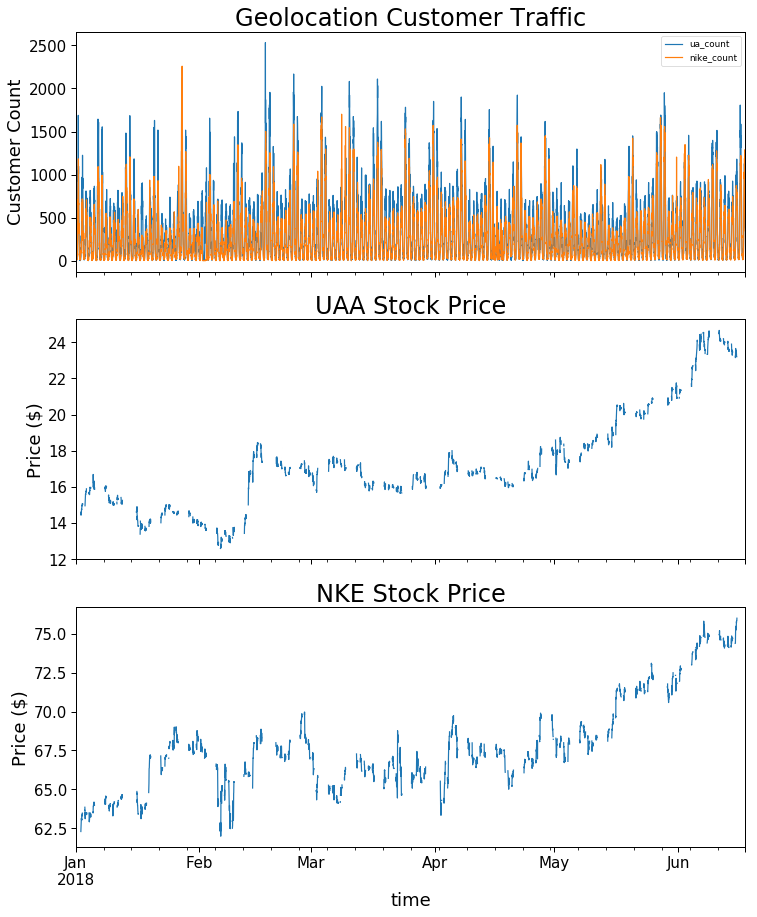

In [6]:
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (12, 15))

total[['ua_count','nike_count']].plot(ax = ax[0])
total['ua_price'].plot(ax = ax[1])
total['nike_price'].plot(ax = ax[2])

ax[0].set_title('Geolocation Customer Traffic')
ax[1].set_title('UAA Stock Price')
ax[2].set_title('NKE Stock Price')

ax[0].set_ylabel('Customer Count')
ax[1].set_ylabel('Price ($)')
ax[2].set_ylabel('Price ($)')

Text(0, 0.5, 'Ratio')

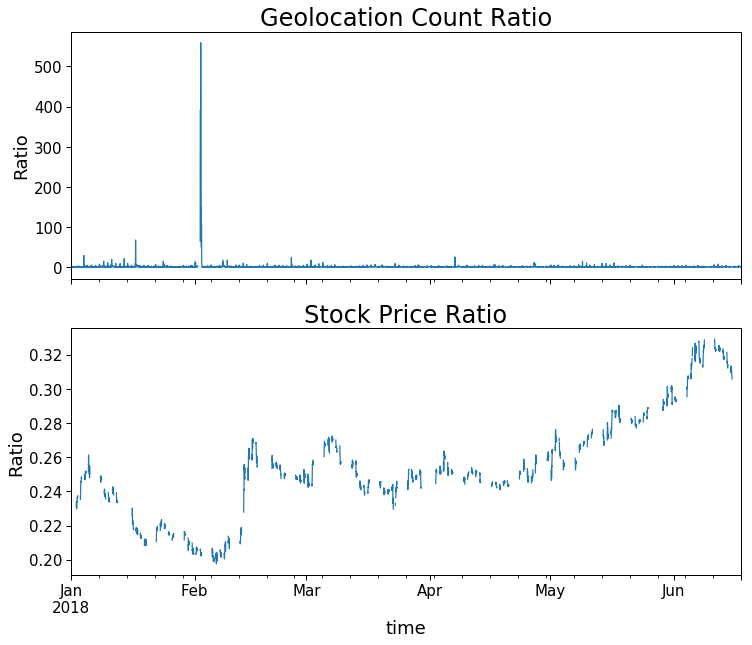

In [7]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (12, 10))

total['count_ratio'].plot(ax = ax[0])
total['price_ratio'].plot(ax = ax[1])

ax[0].set_title('Geolocation Count Ratio')
ax[1].set_title('Stock Price Ratio')

ax[0].set_ylabel('Ratio')
ax[1].set_ylabel('Ratio')

In [8]:
total[['ua_tweet','nike_tweet','tweet_diff']] = total[['ua_tweet','nike_tweet','tweet_diff']].fillna(method = 'bfill')

In [9]:
total.dropna(inplace = True)

In [10]:
total_rolling = total.rolling(min_periods=1, window=12, center=False).mean()

In [11]:
total_rolling.shape

(1923, 15)

Text(0, 0.5, 'Price ($)')

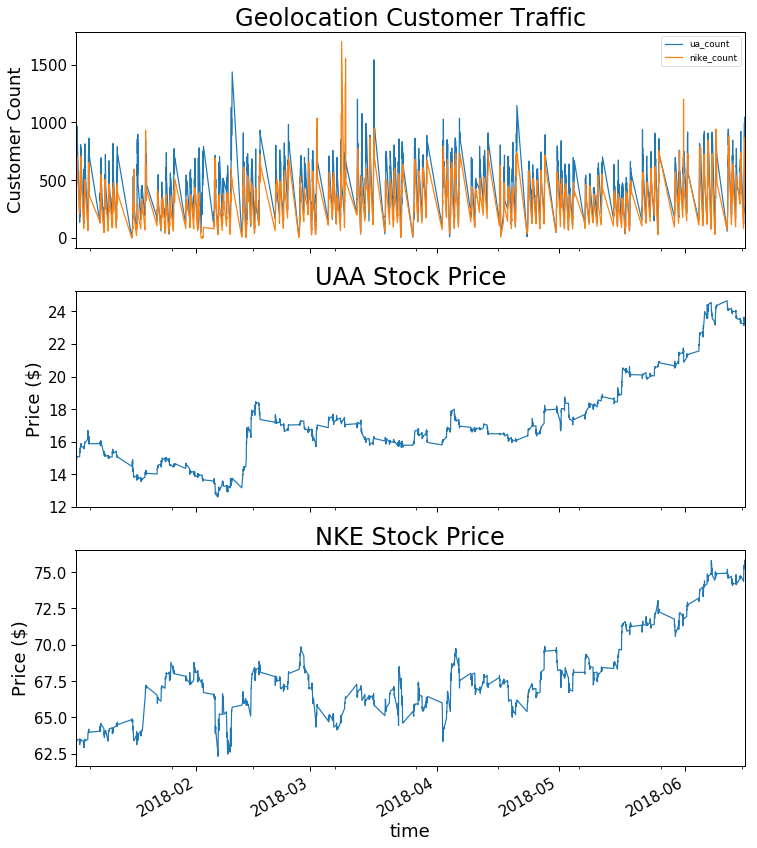

In [12]:
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (12, 15))

total[['ua_count','nike_count']].plot(ax = ax[0])
total['ua_price'].plot(ax = ax[1])
total['nike_price'].plot(ax = ax[2])

ax[0].set_title('Geolocation Customer Traffic')
ax[1].set_title('UAA Stock Price')
ax[2].set_title('NKE Stock Price')

ax[0].set_ylabel('Customer Count')
ax[1].set_ylabel('Price ($)')
ax[2].set_ylabel('Price ($)')

Text(0, 0.5, 'Ratio')

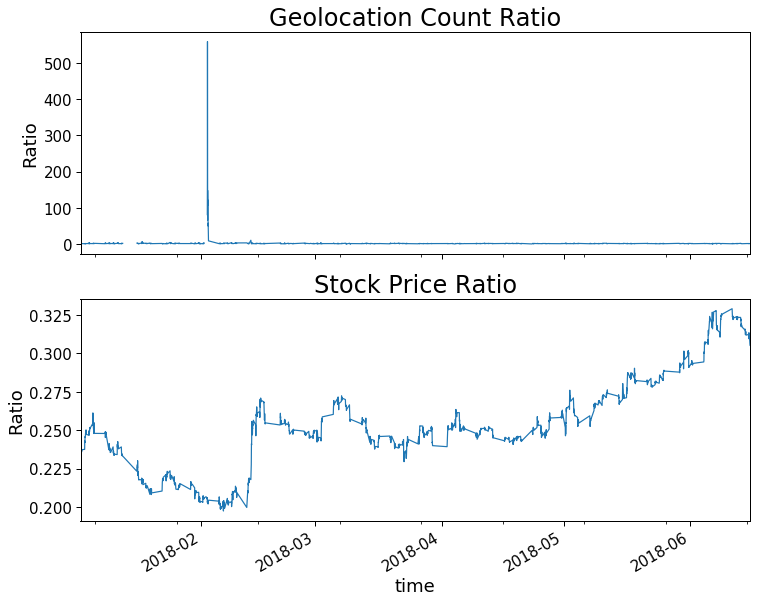

In [13]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (12, 10))

total['count_ratio'].plot(ax = ax[0])
total['price_ratio'].plot(ax = ax[1])

ax[0].set_title('Geolocation Count Ratio')
ax[1].set_title('Stock Price Ratio')

ax[0].set_ylabel('Ratio')
ax[1].set_ylabel('Ratio')

## 4.2 Feature Engineering

In [14]:
# create labels for classification (results for next 30-min)
value_ua = total_rolling.ua_price.shift(-1) - total_rolling.ua_price
value_nike = total_rolling.nike_price.shift(-1) - total_rolling.nike_price
value_ratio = total_rolling.price_ratio.shift(-1) - total_rolling.price_ratio

value_ua = np.where(value_ua>=0, 1, 0)
value_nike = np.where(value_nike>=0, 1, 0)
value_ratio = np.where(value_ratio>=0, 1, 0)

print(value_ua.shape)
print(value_nike.shape)
print(value_ratio.shape)

(1923,)
(1923,)
(1923,)


In [15]:
total_rolling = total_rolling.rename(columns={
    'ua_count':'geo_ua_count',
    'nike_count':'geo_nike_count',
    'count_ratio':'geo_count_ratio'
})

# add rate of returns
return_ua = total_rolling.ua_price/total_rolling.ua_price.shift(1) - 1
return_nike = total_rolling.nike_price/total_rolling.nike_price.shift(1) - 1
return_diff = return_ua - return_nike

# add labels and rate of returns to the dataframe
total_rolling['return_ua'] = return_ua
total_rolling['return_nike'] = return_nike
total_rolling['return_diff'] = return_diff
total_rolling['value_ua'] = value_ua
total_rolling['value_nike'] = value_nike
total_rolling['value_ratio'] = value_ratio

In [16]:
total_rolling.replace([np.inf, -np.inf], np.nan)
total_rolling.dropna(inplace = True)
total_rolling.shape

(1922, 21)

In [17]:
total_rolling.head()

,geo_ua_count,geo_nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,geo_count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio,return_ua,return_nike,return_diff,value_ua,value_nike,value_ratio
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 09:00:00,125.500000,118.0,14.505000,62.680000,3997.000000,2968.000000,0.042650,0.09880,2.50,7.500000,1.080180,0.231412,-0.13870,1.382295,0.333333,0.005198,0.001918,0.003279,0,1,0
2018-01-02 09:30:00,116.000000,109.0,14.503333,62.793333,353331.333333,256972.333333,0.015133,0.09880,3.00,7.666667,1.075431,0.230970,-0.13870,1.379929,0.388889,-0.000115,0.001808,-0.001923,1,1,0
2018-01-02 10:00:00,159.250000,109.0,14.507500,62.882500,428506.500000,295831.250000,0.001375,0.09880,3.25,7.250000,1.469418,0.230710,-0.13870,1.431418,0.458333,0.000287,0.001420,-0.001133,1,1,0
2018-01-02 10:30:00,167.400000,132.4,14.515000,62.936000,464977.600000,307507.600000,0.001100,0.07904,2.80,6.800000,1.352525,0.230633,-0.11096,1.490047,0.406667,0.000517,0.000851,-0.000334,1,1,1
2018-01-02 11:00:00,181.333333,134.0,14.535833,62.965000,450802.000000,301815.500000,-0.003433,0.06960,5.00,7.166667,1.421705,0.230857,-0.10055,1.473348,0.635185,0.001435,0.000461,0.000975,1,1,1


In [18]:
total_rolling.describe()

,geo_ua_count,geo_nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,geo_count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio,return_ua,return_nike,return_diff,value_ua,value_nike,value_ratio
count,1922.000000,1922.000000,1922.000000,1922.000000,1.922000e+03,1.922000e+03,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000
mean,472.734414,342.620552,17.225538,67.706081,3.601284e+05,3.922724e+05,-0.016870,0.009187,7.631570,8.746536,2.780203,0.253398,-0.032023,7.925186,1.329698,0.000254,0.000099,0.000156,0.504162,0.549948,0.507284
std,113.004552,103.212265,2.728789,2.982826,2.058148e+05,1.453437e+05,0.072976,0.041746,10.202226,4.690765,13.739269,0.029716,0.102570,34.272594,1.796865,0.002152,0.001094,0.001891,0.500113,0.497628,0.500077
min,116.000000,2.000000,12.765833,62.680000,3.997000e+03,2.968000e+03,-0.567575,-0.092733,2.250000,3.166667,0.991719,0.199905,-0.816925,0.184043,0.117118,-0.006117,-0.005144,-0.004886,0.000000,0.000000,0.000000
25%,393.732955,270.354167,15.737406,65.863598,2.415885e+05,2.884001e+05,-0.040448,-0.012633,4.166667,6.333333,1.294419,0.239885,-0.060706,0.823360,0.623337,-0.001011,-0.000496,-0.000998,0.000000,0.000000,0.000000
50%,469.166667,338.208333,16.745667,67.260996,3.080358e+05,3.645940e+05,-0.008154,0.002825,5.416667,7.500000,1.404162,0.250277,-0.013679,1.198794,0.947604,0.000000,0.000086,0.000024,1.000000,1.000000,1.000000
75%,538.125000,405.166667,18.121673,68.579694,4.142910e+05,4.699880e+05,0.016827,0.021527,7.333333,9.333333,1.571669,0.268517,0.020233,2.159299,1.377227,0.001436,0.000686,0.001073,1.000000,1.000000,1.000000
max,1012.750000,751.500000,24.366667,75.514583,2.207480e+06,1.109041e+06,0.357042,0.280025,100.833333,43.333333,222.352041,0.325221,0.331958,322.825403,18.896928,0.013843,0.004139,0.013728,1.000000,1.000000,1.000000


In [19]:
X = total_rolling.drop(total_rolling.columns[[18,19,20]], axis=1) # drop the target
y = total_rolling.value_ratio.astype('category')

In [20]:
print(X.shape)
print(y.shape)

(1922, 18)
(1922,)


## 4.3 Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

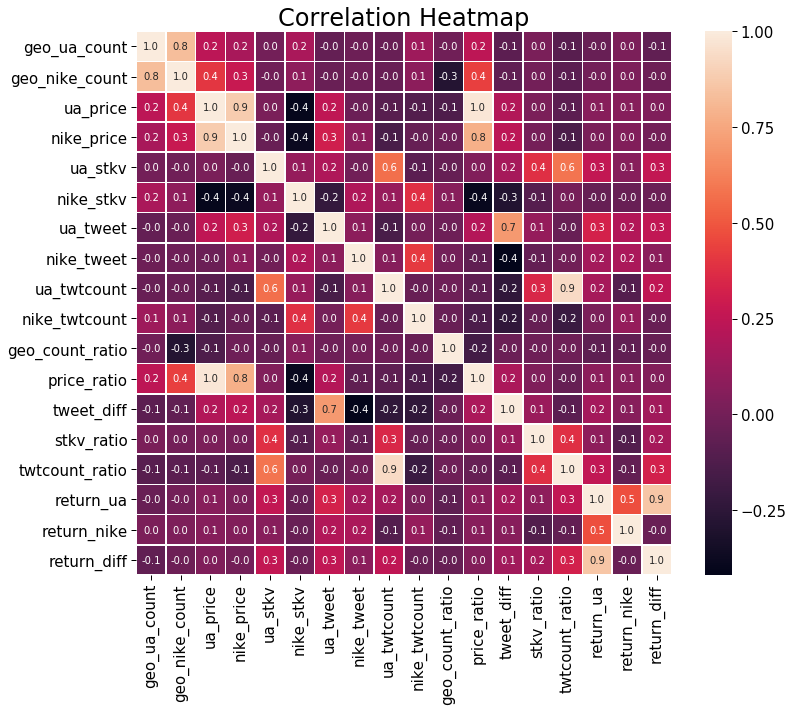

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.title('Correlation Heatmap', size = 24)

Number of ups:  975
Number of downs :  947


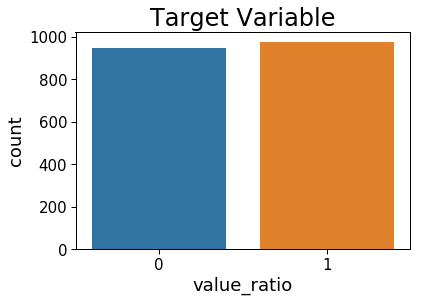

In [22]:
ax = sns.countplot(y, label="Count") 
ups, downs = y.value_counts()
plt.title('Target Variable')
print('Number of ups: ', ups)
print('Number of downs : ', downs)

## 4.4 Feature Selection

### 4.4.1 Variance Filtering

In [23]:
threshold = 0.8
vt = VarianceThreshold().fit(X)

feat_var_threshold = X.columns[vt.variances_ > threshold * (1 - threshold)]
feat_var_threshold

Index(['geo_ua_count', 'geo_nike_count', 'ua_price', 'nike_price', 'ua_stkv',
       'nike_stkv', 'ua_twtcount', 'nike_twtcount', 'geo_count_ratio',
       'stkv_ratio', 'twtcount_ratio'],
      dtype='object')

In [24]:
len(feat_var_threshold)

11

### 4.4.2 Importance Ranking

In [25]:
modelr = RandomForestClassifier(random_state = 42)
modelr.fit(X, y)

feature_impr = pd.DataFrame(modelr.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_9r = feature_impr.sort_values("importance", ascending=False).head(9).index
feat_imp_9r

Index(['return_diff', 'return_ua', 'return_nike', 'ua_stkv', 'nike_price',
       'geo_count_ratio', 'nike_tweet', 'ua_price', 'twtcount_ratio'],
      dtype='object')

In [26]:
modela = AdaBoostClassifier(random_state = 42)
modela.fit(X, y)

feature_impa = pd.DataFrame(modela.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_9a = feature_impa.sort_values("importance", ascending=False).head(9).index
feat_imp_9a

Index(['return_diff', 'tweet_diff', 'geo_ua_count', 'ua_stkv',
       'twtcount_ratio', 'return_nike', 'nike_price', 'nike_stkv',
       'ua_twtcount'],
      dtype='object')

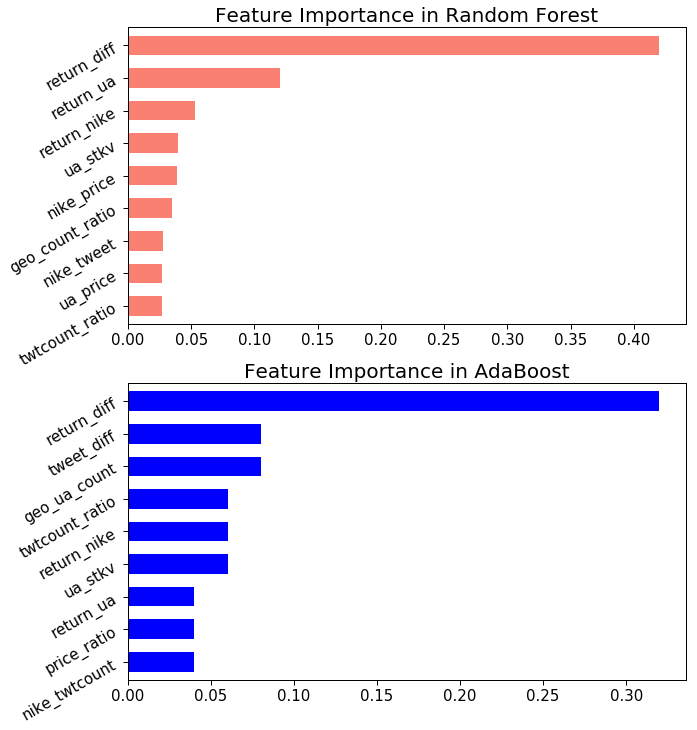

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(10,12))

pd.Series(modelr.feature_importances_, X.columns).sort_values(ascending=True).tail(9).plot.barh(width=0.6, ax=ax[0], color='salmon')
ax[0].set_title('Feature Importance in Random Forest', fontsize=20)
ax[0].tick_params(axis='y', rotation=30)

pd.Series(modela.feature_importances_, X.columns).sort_values(ascending=True).tail(9).plot.barh(width=0.6, ax=ax[1], color='blue')
ax[1].set_title('Feature Importance in AdaBoost', fontsize=20)
ax[1].tick_params(axis='y', rotation=30)

### 4.4.3 SelectKBest with Chi-square

In [28]:
X_minmax = MinMaxScaler().fit_transform(X)
X_scored = SelectKBest(score_func=chi2, k='all').fit(X_minmax, y)
feature_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': X_scored.scores_
    })

feat_scored_9 = feature_scoring.sort_values('score', ascending=False).head(9)['feature'].values
feat_scored_9

array(['return_diff', 'return_ua', 'geo_count_ratio', 'twtcount_ratio',
       'ua_twtcount', 'stkv_ratio', 'ua_stkv', 'price_ratio', 'ua_price'],
      dtype=object)

### 4.4.4 Recursive Feature Elimination

In [29]:
rfe = RFE(LogisticRegression(), 9)
rfe.fit(X, y)

feature_rfe_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': rfe.ranking_
    })

feat_rfe_9 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
feat_rfe_9

array(['ua_price', 'nike_price', 'ua_tweet', 'nike_tweet', 'ua_twtcount',
       'tweet_diff', 'twtcount_ratio', 'return_ua', 'return_diff'],
      dtype=object)

### 4.4.5 Put All Things Together

In [30]:
features = np.hstack([
    feat_var_threshold,
    feat_imp_9r, 
    feat_imp_9a,
    feat_scored_9,
    feat_rfe_9
    ])

fc = pd.DataFrame(pd.Series(features).value_counts(), 
                  columns = ['count']).reset_index().rename(columns = {'index':'feature'})
fc

,feature,count
0,twtcount_ratio,5
1,return_diff,4
2,ua_stkv,4
3,ua_price,4
4,ua_twtcount,4
5,nike_price,4
6,geo_count_ratio,3
7,return_ua,3
8,geo_ua_count,2
9,return_nike,2


In [31]:
features = fc.feature[fc['count'] > 2].tolist()

print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-twtcount_ratio
	-return_diff
	-ua_stkv
	-ua_price
	-ua_twtcount
	-nike_price
	-geo_count_ratio
	-return_ua


In [32]:
print(len(features))
X = X.ix[:, features]

8


## 4.5 Modeling

### 5.1 Preparation

In [33]:
random_state = 42
processors = -1
scoring = 'accuracy'
kfold = RepeatedKFold(n_splits=10, n_repeats=10, random_state=random_state)
cart = DecisionTreeClassifier(random_state = random_state)

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = random_state)
print('Training set features shape: {}'.format(X_train.shape))
print('Training set target shape: {}'. format((y_train).shape))

Training set features shape: (1345, 8)
Training set target shape: (1345,)


### 5.2 Simple Modeling

#### Cross Validation

In [36]:
classifiers = [
    SVC(random_state = random_state),
    DecisionTreeClassifier(random_state = random_state),
    KNeighborsClassifier(),
    LogisticRegression(random_state = random_state),
    LDA(), 
    QDA(), 
    GaussianNB(),
    BaggingClassifier(base_estimator=cart, random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    AdaBoostClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    XGBClassifier(objective = 'binary:logistic', seed = random_state),
]

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cla_names = [
    "Support Vector Machine","Decision Tree","KNeighbors",
    "Logistic Regression","Linear Discriminant Analysis",
    "Quadratic Discriminant Analysis","Naive Bayes","Bagging Trees", 
    "Random Forest", "AdaBoosting","Gradient Boosting", "XGBoost"
]
    
cv_res = pd.DataFrame({"Method": cla_names,
                       "CrossValMeans": cv_means,
                       "CrossValerrors": cv_std})

cv_res = cv_res.sort_values(['CrossValMeans'],ascending=False).reset_index(drop=True)
cv_res

,Method,CrossValMeans,CrossValerrors
0,XGBoost,0.844045,0.029798
1,Logistic Regression,0.843222,0.032263
2,Linear Discriminant Analysis,0.842843,0.032838
3,Random Forest,0.841369,0.030206
4,AdaBoosting,0.840181,0.032560
5,Support Vector Machine,0.839431,0.031218
6,Gradient Boosting,0.838985,0.031752
7,Bagging Trees,0.836383,0.030055
8,KNeighbors,0.831179,0.033025
9,Quadratic Discriminant Analysis,0.824400,0.032828


In [37]:
pl = pd.DataFrame(data = cv_results, index = cla_names)
pl = pl.T
pl.head()

,Support Vector Machine,Decision Tree,KNeighbors,Logistic Regression,Linear Discriminant Analysis,Quadratic Discriminant Analysis,Naive Bayes,Bagging Trees,Random Forest,AdaBoosting,Gradient Boosting,XGBoost
0,0.837037,0.792593,0.829630,0.837037,0.859259,0.814815,0.807407,0.829630,0.844444,0.814815,0.829630,0.837037
1,0.807407,0.711111,0.770370,0.807407,0.829630,0.807407,0.718519,0.800000,0.807407,0.807407,0.814815,0.807407
2,0.859259,0.807407,0.866667,0.859259,0.874074,0.859259,0.837037,0.851852,0.866667,0.896296,0.866667,0.881481
3,0.814815,0.762963,0.807407,0.851852,0.814815,0.822222,0.703704,0.822222,0.829630,0.822222,0.822222,0.844444
4,0.859259,0.792593,0.851852,0.859259,0.851852,0.837037,0.866667,0.800000,0.859259,0.866667,0.829630,0.837037


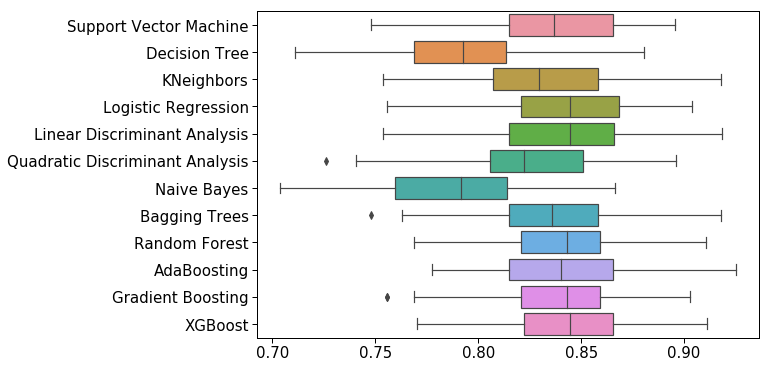

In [38]:
plt.figure(figsize = (9,6))
sns.boxplot(data = pl, orient = 'h')

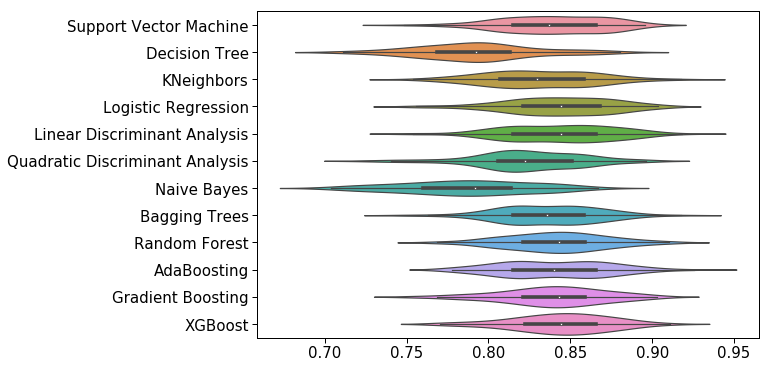

In [39]:
plt.figure(figsize = (9,6))
sns.violinplot(data = pl, orient = 'h')

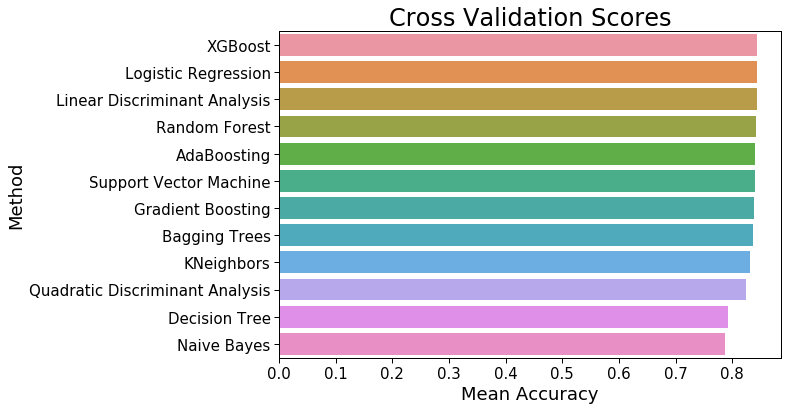

In [40]:
plt.figure(figsize = (9,6))
sns.barplot("CrossValMeans", "Method", data = cv_res)
plt.xlabel("Mean Accuracy")
plt.title("Cross Validation Scores")
plt.show()

#### Using Testing Set

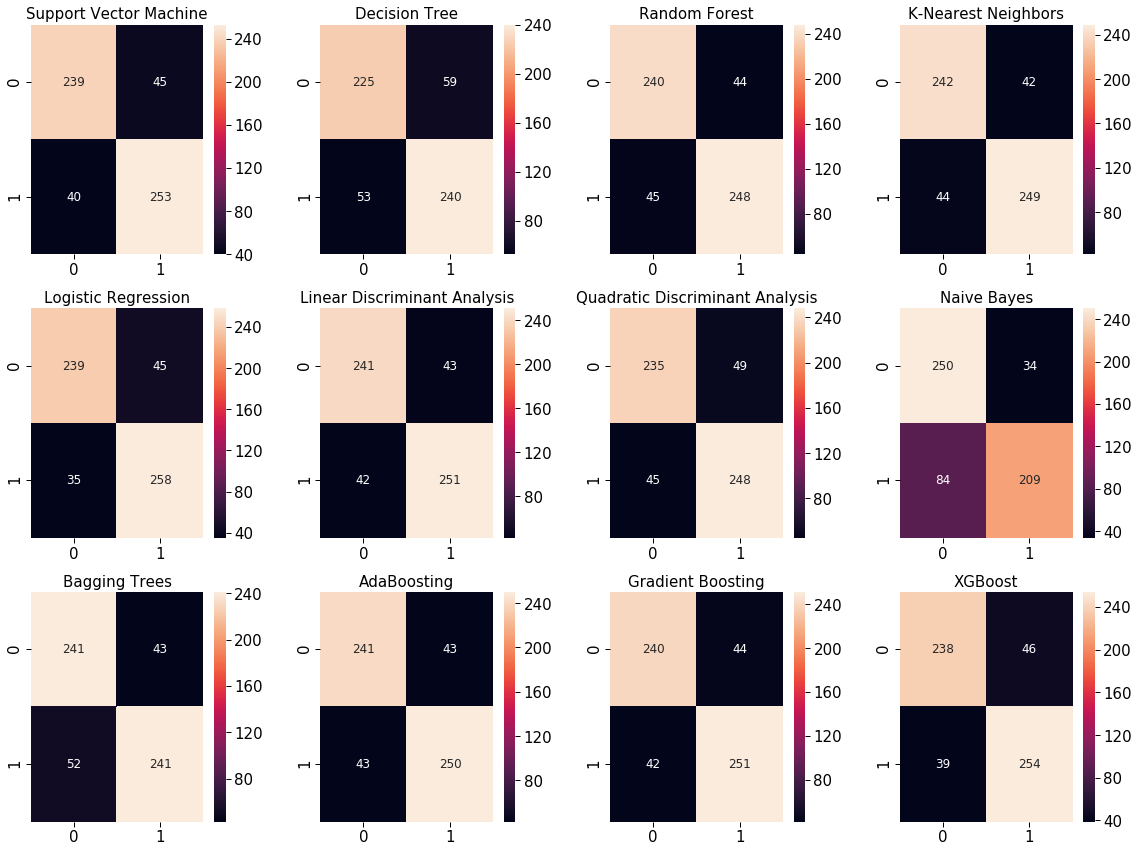

In [41]:
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":15,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15})

f, ax = plt.subplots(3,4,figsize=(16,12))

acc=[]

model=SVC(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,0],annot=True,fmt='d')
ax[0,0].set_title('Support Vector Machine')

model=DecisionTreeClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,1],annot=True,fmt='d')
ax[0,1].set_title('Decision Tree')

model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,3],annot=True,fmt='d')
ax[0,3].set_title('K-Nearest Neighbors')

model=LogisticRegression(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,0],annot=True,fmt='d')
ax[1,0].set_title('Logistic Regression')

model=LDA()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,1],annot=True,fmt='d')
ax[1,1].set_title('Linear Discriminant Analysis')

model=QDA()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,2],annot=True,fmt='d')
ax[1,2].set_title('Quadratic Discriminant Analysis')

model=GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,3],annot=True,fmt='d')
ax[1,3].set_title('Naive Bayes')

model=BaggingClassifier(base_estimator = cart, random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,0],annot=True,fmt='d')
ax[2,0].set_title('Bagging Trees')

model=RandomForestClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,2],annot=True,fmt='d')
ax[0,2].set_title('Random Forest')

model=AdaBoostClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,1],annot=True,fmt='d')
ax[2,1].set_title('AdaBoosting')

model=GradientBoostingClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,2],annot=True,fmt='d')
ax[2,2].set_title('Gradient Boosting')

model=XGBClassifier(objective = 'binary:logistic', seed = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,3],annot=True,fmt='d')
ax[2,3].set_title('XGBoost')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.tight_layout()
plt.show()

In [42]:
accdf = pd.DataFrame({"Accuracy":acc,
                      "Algorithm":["SVM","DT","KNN",
                                   "LR","LDA","QDA",
                                   "NB","Bagging","RF",
                                   "Ada","GBDT","XGB"]})

accdf = accdf.sort_values(['Accuracy'],ascending=False).reset_index(drop=True)
accdf

,Accuracy,Algorithm
0,0.861352,LR
1,0.852686,SVM
2,0.852686,LDA
3,0.852686,XGB
4,0.850953,KNN
5,0.850953,Ada
6,0.850953,GBDT
7,0.845754,RF
8,0.837088,QDA
9,0.835355,Bagging


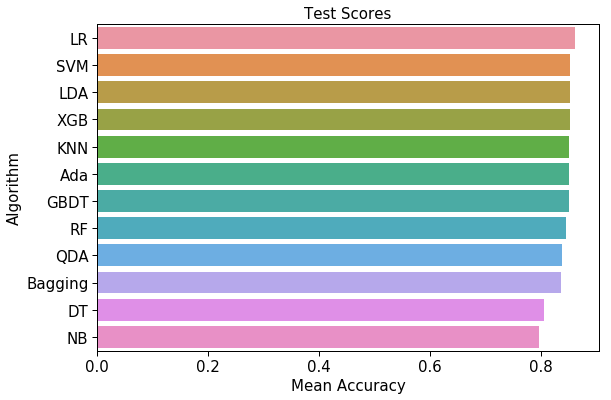

In [43]:
plt.figure(figsize = (9,6))
sns.barplot("Accuracy", "Algorithm", data = accdf)
plt.xlabel("Mean Accuracy")
plt.title("Test Scores")
plt.show()

### 5.3 Hyperparameter Tuning

In [44]:
lr_grid = GridSearchCV(
    estimator = LogisticRegression(random_state=random_state),
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.0001,0.001,0.01]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

lr_grid.fit(X_train, y_train)

print("Logistic:")
print("="*30)
print(lr_grid.best_score_)
print(lr_grid.best_params_)

Logistic:
0.8438661710037175
{'C': 0.01, 'penalty': 'l1'}


In [45]:
lda_grid = GridSearchCV(
    estimator = LDA(),
    param_grid = {
        'solver': ['svd', 'lsqr'],
        'n_components': [None, 2, 5]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

lda_grid.fit(X_train, y_train)

print("Linear Discriminant Analysis:")
print("="*30)
print(lda_grid.best_score_)
print(lda_grid.best_params_)

Linear Discriminant Analysis:
0.8428252788104089
{'n_components': None, 'solver': 'svd'}


In [46]:
qda_grid = GridSearchCV(
    estimator = QDA(),
    param_grid = {
        'priors': [None, 0, 1],
        'reg_param': [0, 0.1, 0.2]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

qda_grid.fit(X_train, y_train)

print("Quadratic Discriminant Analysis:")
print("="*30)
print(qda_grid.best_score_)
print(qda_grid.best_params_)

Quadratic Discriminant Analysis:
0.8374721189591078
{'priors': None, 'reg_param': 0.1}


In [47]:
bag_grid = RandomizedSearchCV(
    estimator = BaggingClassifier(base_estimator=cart, warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [100, 200, 500],
        'max_samples': [0.1, 0.3, 0.5],
        'max_features': [0.5, 0.7, 0.9]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

bag_grid.fit(X_train, y_train)

print("Bagging Trees:")
print("="*30)
print(bag_grid.best_score_)
print(bag_grid.best_params_)

Bagging Trees:
0.8462453531598513
{'n_estimators': 500, 'max_samples': 0.3, 'max_features': 0.5}


In [48]:
rf_grid = RandomizedSearchCV(
    estimator = RandomForestClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [8, 10, 12],
        'max_features': ['sqrt', 'log2']
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

rf_grid.fit(X_train, y_train)

print("Random Forest:")
print("="*30)
print(rf_grid.best_score_)
print(rf_grid.best_params_)

Random Forest:
0.8452788104089219
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy'}


In [49]:
ada_grid = RandomizedSearchCV(
    estimator = AdaBoostClassifier(random_state=random_state),
    param_distributions = {
        'algorithm': ['SAMME', 'SAMME.R'],
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.1, 0.5, 1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

ada_grid.fit(X_train, y_train)

print("Adaboost:")
print("="*30)
print(ada_grid.best_score_)
print(ada_grid.best_params_)

Adaboost:
0.8426765799256506
{'n_estimators': 500, 'learning_rate': 1, 'algorithm': 'SAMME'}


In [50]:
gbm_grid = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        'max_features': [0.05, 0.1, 0.3],
        'learning_rate': [0.05, 0.1, 0.3]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

gbm_grid.fit(X_train, y_train)

print("Gradiant Boosting Machine:")
print("="*30)
print(gbm_grid.best_score_)
print(gbm_grid.best_params_)

Gradiant Boosting Machine:
0.8450557620817843
{'n_estimators': 200, 'max_features': 0.3, 'max_depth': 4, 'learning_rate': 0.05}


In [51]:
xgb_grid = RandomizedSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic', seed = random_state), 
    param_distributions = {
    'learning_rate': [0.05, 0.1, 0.2], 
    'n_estimators': [200, 500, 1000],
    'subsample': [0.1, 0.3, 0.5]
}, 
    n_iter = 10, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors,
    verbose = False) 

xgb_grid.fit(X_train, y_train)

print("XGBoost:")
print("="*30)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

XGBoost:
0.8455018587360594
{'subsample': 0.5, 'n_estimators': 200, 'learning_rate': 0.05}


### 4.4 Stacking & Voting

#### StackingClassifier

In [52]:
clf1 = LogisticRegression(penalty='l1', C=0.01)
clf2 = LDA(solver = 'svd', n_components = None)
clf3 = QDA(priors = None, reg_param = 0)
clf4 = BaggingClassifier(base_estimator=cart, n_estimators=100, max_samples=0.1, max_features=0.9, warm_start=True, random_state=random_state)
clf5 = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=10, criterion='gini', warm_start=True, random_state=random_state)
clf6 = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, algorithm='SAMME.R')
clf7 = GradientBoostingClassifier(n_estimators=100, max_features=0.05, max_depth=3, learning_rate=0.1, warm_start=True, random_state=random_state)
clf8 = XGBClassifier(objective='binary:logistic', subsample=0.1, n_estimators=200, learning_rate=0.05, random_state=random_state)

lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8], 
                          use_probas=True, average_probas=False,
                          meta_classifier=lr)

print('10-time 10-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, sclf], 
                      ['LR', 
                       'LDA', 
                       'Bagging Trees',
                       'Random Forest',
                       'Adaboost',
                       'GBDT',
                       'XGBoost',
                       'Stacking']):

    scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring=scoring)
    print("ACC: %0.3f (+/- %0.3f) [%s]" 
          % (scores.mean(), scores.std(), label))

10-time 10-fold cross validation:

ACC: 0.844 (+/- 0.031) [LR]
ACC: 0.843 (+/- 0.033) [LDA]
ACC: 0.824 (+/- 0.033) [Bagging Trees]
ACC: 0.842 (+/- 0.034) [Random Forest]
ACC: 0.845 (+/- 0.031) [Adaboost]
ACC: 0.844 (+/- 0.032) [GBDT]
ACC: 0.842 (+/- 0.033) [XGBoost]
ACC: 0.844 (+/- 0.032) [Stacking]


#### VotingClassifier

In [53]:
# Create sub models
estimators = [
    ('lr',clf1),
    ('lda',clf2),
    ('qda',clf3),
    ('bag',clf4),
    ('rf',clf5),
    ('ada',clf6),
    ('gbm',clf7),
    ('xgb',clf8)
]

# Create the ensemble model
ensemble = VotingClassifier(estimators, voting = 'soft')
results = cross_val_score(ensemble, X_train, y_train, cv = kfold, scoring = scoring, n_jobs = processors)

print("Ensemble:")
print("="*30)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

Ensemble:
(0.845) +/- (0.031)


In [54]:
mod = ensemble

mod.fit(X_train, y_train)
preds_test = model.predict(X_test)
accuracy = float(np.sum(preds_test == y_test)) / pd.Series(y_test).shape[0]


print("Test Accuracy: ", round(accuracy, 3))

Accuracy:  0.853
